In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
data = pd.read_csv("C:\\Users\\Vivek K N\\Regressions for Data Science\\Simple Linear Regression\\1.04.+Real-life+example.csv")
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
data.describe(include='all') #include='all' gives the information abut categorical data also
#Always remember the data given should be cleaned and preprocessed first
#unique row name in below table provides the number of ML models to be created
#if unique>20 for any column just remove that column

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data1 = data.drop(['Model'], axis = 1) # for row, axis=0 whereas for column axis = 1
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
data1.isnull()#this method is used to check whether any entries in data is missing or not
data1.isnull().sum()#this method provides number of missing values

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data1.dropna(axis=0) #DataFrame.dropna(axis=) is a method that is used to drop values which are missing
#Always be careful either to delete row elements which are missing or column elements which are missing because if column elements are removed 
#the variable(or features) may affect ur complete model and can make it inefficient
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


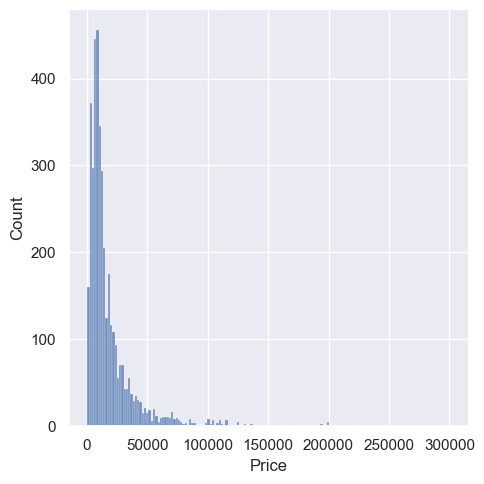

In [7]:
sns.displot(data_no_mv['Price'])

In [8]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<=q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


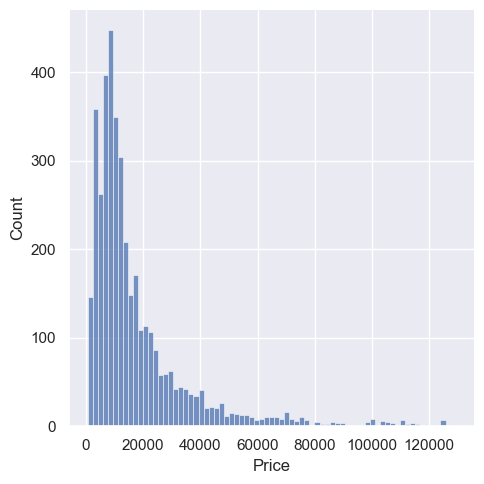

In [9]:
sns.displot(data_1['Price'])

In [10]:
q2 = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q2]
data_2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


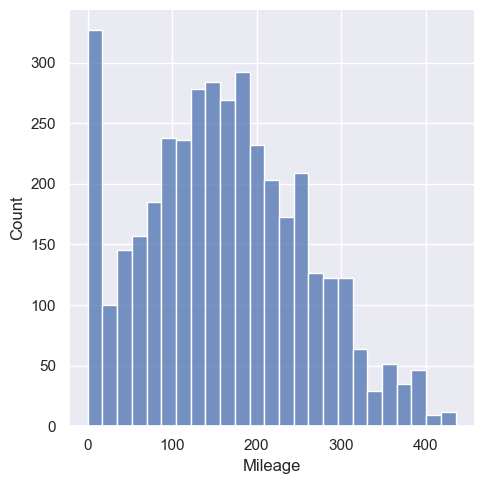

In [11]:
sns.displot(data_2['Mileage'])

In [12]:
data_3 = data_2[data_2['EngineV']<6.5]
data_3.describe()

,Price,Mileage,EngineV,Year
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,17988.421311,161.279776,2.443497,2006.406019
std,19041.658686,96.068269,0.946198,6.595871
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


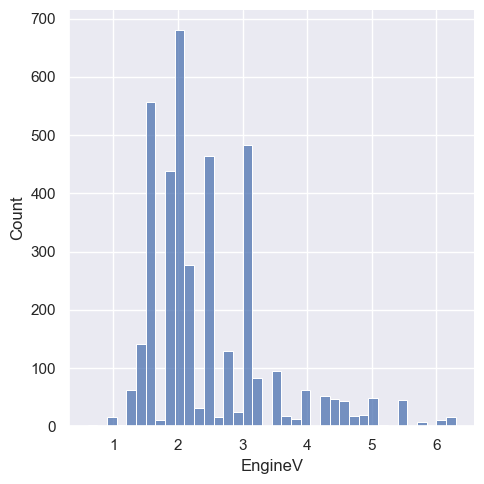

In [13]:
sns.displot(data_3['EngineV'])

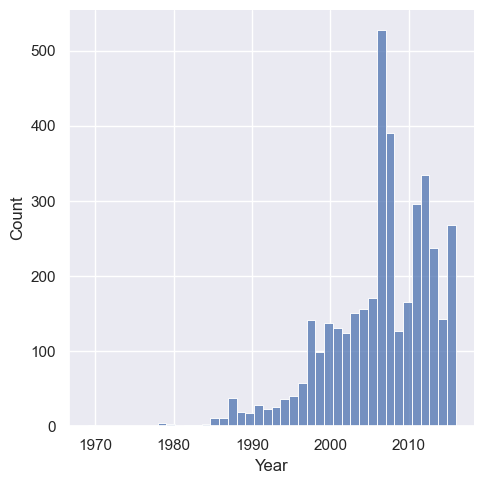

In [14]:
sns.displot(data_3['Year'])

In [15]:
q3 = data_3['Year'].quantile(0.01) 
data_4 = data_3[data_3['Year']>q3]
data_4.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


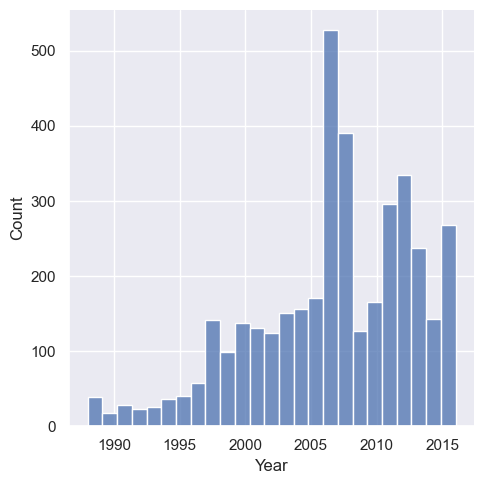

In [16]:
sns.displot(data_4['Year'])

In [17]:
data_cleaned = data_4.reset_index(drop = True)
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking for OLS Assumptions


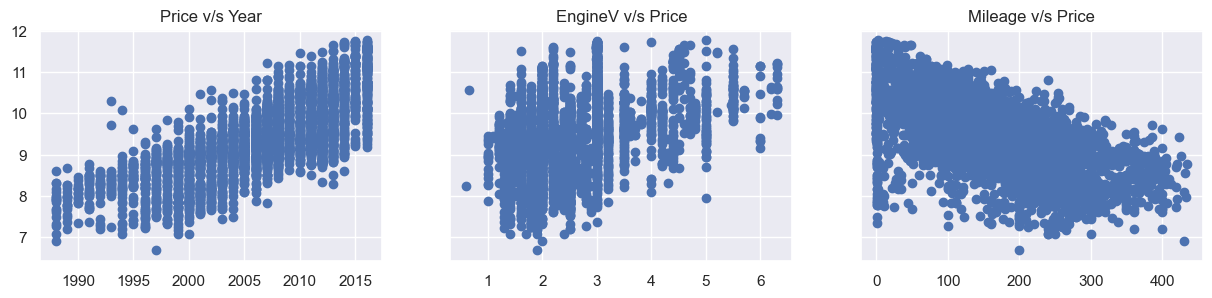

In [18]:
log_price = np.log(data_cleaned['Price']) #np.log() method is used to calculate the log price of any data
#Here price is looged and always remember that the dependent variables must be looged or exponentialled.
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
ax1.scatter(data_cleaned['Year'], log_price)
ax1.set_title("Price v/s Year")
ax2.scatter(data_cleaned['EngineV'], log_price)
ax2.set_title("EngineV v/s Price")
ax3.scatter(data_cleaned['Mileage'], log_price)
ax3.set_title("Mileage v/s Price")
plt.show()

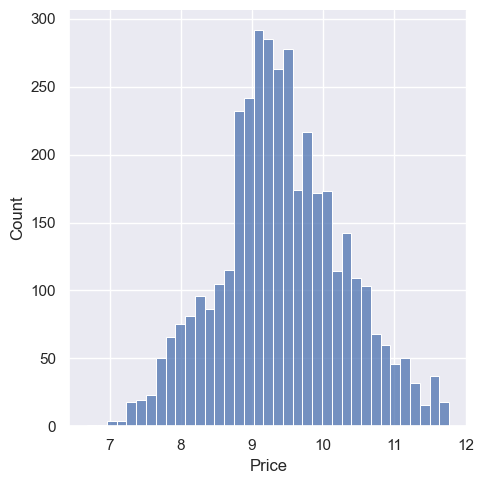

In [19]:
sns.displot(log_price)

In [20]:
data_cleaned['Log Price'] = log_price
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,9.415703
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,0.876616
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


In [21]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1)
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #variance inflation factor is used for Multicollinearity
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [(variance_inflation_factor(variables.values, i)) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [23]:
variables.shape

(3867, 3)

## VIF = 1 : No Multicollinearity
## 1<VIF<5 : Perfectly Okay
## VIF > 6 : Not acceptable

In [24]:
data_cleaned1 = data_cleaned.drop(['Year'], axis=1)
data_cleaned1

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [25]:
data_with_dummies = pd.get_dummies(data_cleaned1, drop_first=True)#pd.get_dummies is used to determine all dummies in the given dataset
data_with_dummies.head()
#Setting dro_first True in pd.get_dummies removes multicollineraity

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [26]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'Log Price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [27]:
cols = ['Log Price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [28]:
data_preproccessed = data_with_dummies[cols]
data_preproccessed

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Linear Regression Model

In [29]:
targets = data_preproccessed['Log Price']
variables = data_preproccessed.drop(['Log Price'], axis=1)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
scaler.fit(variables)

StandardScaler()

In [32]:
variables_scaled = scaler.transform(variables)

## Train and Test data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(variables_scaled, targets, test_size=0.2, random_state = 365)

In [35]:
x_train

array([[ 0.25577519, -1.106607  , -0.43865069, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.86322675, -1.00125996, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-0.4344503 , -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [ 0.64271979,  3.21262147, -0.43865069, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 1.24928159,  0.05221039, -0.43865069, ...,  6.16932785,
        -0.75037043, -3.11164272],
       [-0.58086177, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [36]:
x_test

array([[ 1.45844083,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 0.62180387, -0.15848368, -0.43865069, ..., -0.16209221,
         1.33267512, -3.11164272],
       [-0.58086177, -1.106607  , -0.43865069, ..., -0.16209221,
         1.33267512,  0.32137366],
       ...,
       [-1.36520892, -0.89591293, -0.43865069, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-1.66848982,  1.10568075, -0.43865069, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.15208533, -0.89591293, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
regression = LinearRegression()
regression.fit(x_train, y_train)#it should always be given with 2D arrays

LinearRegression()

In [39]:
regression.score(x_train, y_train)

0.744996578792662

In [40]:
x_axis = regression.coef_

In [41]:
y_axis = regression.intercept_

In [42]:
y_values = regression.predict(x_train)
y_values

array([8.85904429, 9.3574518 , 9.65596774, ..., 9.8871806 , 7.88940919,
       9.93899564])

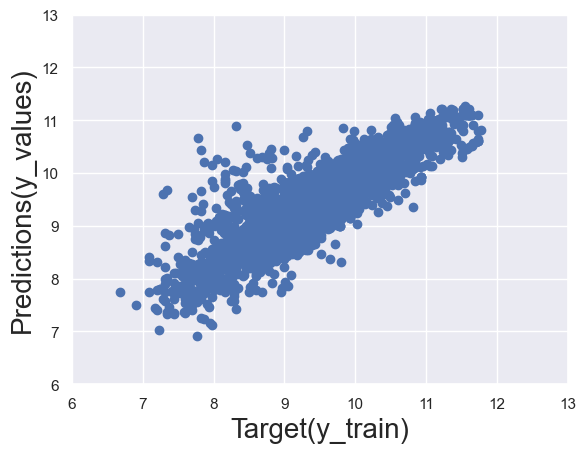

In [43]:
plt.scatter(y_train, y_values)
plt.xlabel('Target(y_train)', fontsize = 20)
plt.ylabel('Predictions(y_values)', fontsize = 20)
plt.xlim(6, 13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

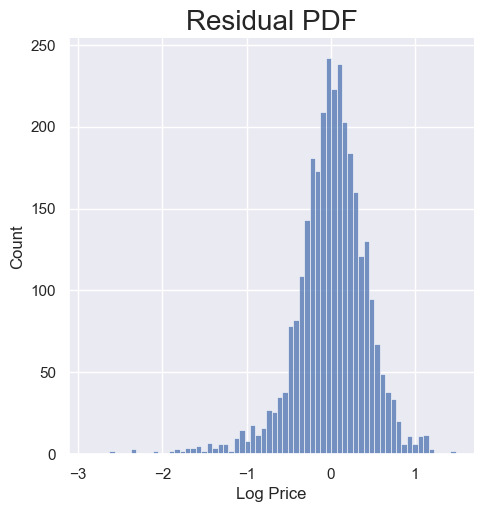

In [44]:
sns.displot(y_train-y_values) #this is method to show distribution of residuals present in dataset
plt.title("Residual PDF", fontsize = 20)

In [45]:
table = pd.DataFrame(variables.columns.values, columns = ['Features'])
table['Weights'] = x_axis
table

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [46]:
y_hat_test = regression.predict(x_test)

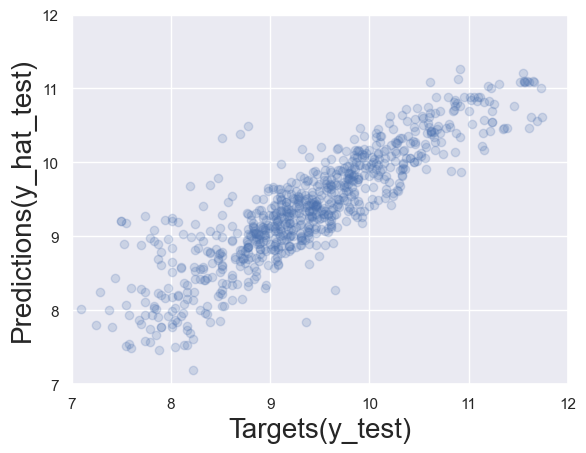

In [47]:
plt.scatter(y_test, y_hat_test, alpha = 0.2)#alpha inside plt.scatter is used for opacity of scatter plot.Higher the opacity higher the concentration
plt.xlabel("Targets(y_test)", fontsize = 20)
plt.ylabel("Predictions(y_hat_test)", fontsize= 20)
plt.xlim(7, 12)
plt.ylim(7, 12)
plt.show()

In [48]:
df_performance = pd.DataFrame()
df_performance['Predictions'] = y_hat_test

In [49]:
df_performance

,Predictions
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280
...,...
769,10.297276
770,9.280992
771,9.541258
772,10.221496


In [50]:
df_performance['Original prices'] = np.exp(df_performance['Predictions'])

In [51]:
df_performance

,Predictions,Original prices
0,9.276643,10685.501696
1,8.160305,3499.255242
2,8.929738,7553.285218
3,8.917842,7463.963017
4,9.337280,11353.490075
...,...,...
769,10.297276,29651.726363
770,9.280992,10732.071179
771,9.541258,13922.446953
772,10.221496,27487.751303


In [52]:
df_performance['Targets'] = np.exp(y_test)

In [53]:
df_performance.head(200)

,Predictions,Original prices,Targets
0,9.276643,10685.501696,NaN
1,8.160305,3499.255242,7900.0
2,8.929738,7553.285218,NaN
3,8.917842,7463.963017,NaN
4,9.337280,11353.490075,NaN
...,...,...,...
195,9.932491,20588.568482,NaN
196,8.690817,5948.039267,NaN
197,7.662229,2126.492038,NaN
198,9.797188,17983.098623,NaN


In [54]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: Log Price, dtype: float64

In [55]:
df_performance['Targets'] = np.exp(y_test)

In [56]:
df_performance

,Predictions,Original prices,Targets
0,9.276643,10685.501696,2300.0
1,8.160305,3499.255242,2800.0
2,8.929738,7553.285218,2500.0
3,8.917842,7463.963017,6400.0
4,9.337280,11353.490075,9150.0
...,...,...,...
769,10.297276,29651.726363,29500.0
770,9.280992,10732.071179,9600.0
771,9.541258,13922.446953,18300.0
772,10.221496,27487.751303,68500.0


In [57]:
df_performance['Residual'] = df_performance['Targets'] - df_performance['Original prices']

In [58]:
df_performance

,Predictions,Original prices,Targets,Residual
0,9.276643,10685.501696,2300.0,-8385.501696
1,8.160305,3499.255242,2800.0,-699.255242
2,8.929738,7553.285218,2500.0,-5053.285218
3,8.917842,7463.963017,6400.0,-1063.963017
4,9.337280,11353.490075,9150.0,-2203.490075
...,...,...,...,...
769,10.297276,29651.726363,29500.0,-151.726363
770,9.280992,10732.071179,9600.0,-1132.071179
771,9.541258,13922.446953,18300.0,4377.553047
772,10.221496,27487.751303,68500.0,41012.248697


In [59]:
df_performance.describe()

,Predictions,Original prices,Targets,Residual
count,774.000000,774.000000,774.000000,774.000000
mean,9.385186,15946.760167,18165.817106,2219.056939
std,0.776155,13133.197604,19967.858908,10871.218143
min,7.185813,1320.562768,1200.000000,-29456.498331
25%,8.911070,7413.644234,6900.000000,-2044.191251
50%,9.356012,11568.168859,11600.000000,142.518577
75%,9.911575,20162.408805,20500.000000,3147.343497
max,11.256782,77403.055224,126000.000000,85106.162329


In [60]:
df_performance['Difference%'] = np.absolute(df_performance['Residual']/df_performance['Targets'] * 100)
df_performance

,Predictions,Original prices,Targets,Residual,Difference%
0,9.276643,10685.501696,2300.0,-8385.501696,364.587030
1,8.160305,3499.255242,2800.0,-699.255242,24.973402
2,8.929738,7553.285218,2500.0,-5053.285218,202.131409
3,8.917842,7463.963017,6400.0,-1063.963017,16.624422
4,9.337280,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...,...
769,10.297276,29651.726363,29500.0,-151.726363,0.514327
770,9.280992,10732.071179,9600.0,-1132.071179,11.792408
771,9.541258,13922.446953,18300.0,4377.553047,23.921055
772,10.221496,27487.751303,68500.0,41012.248697,59.871896


Always Remember to perform standardization(or Data Preprocessing) after performing Data Cleaning

In [61]:
df_performance.sort_values(by=['Difference%'])

,Predictions,Original prices,Targets,Residual,Difference%
698,10.324854,30480.847838,30500.0,19.152162,0.062794
742,9.738631,16960.310476,16999.0,38.689524,0.227599
60,9.431017,12469.207487,12500.0,30.792513,0.246340
110,10.150900,25614.137960,25500.0,-114.137960,0.447600
367,10.662040,42703.676996,42500.0,-203.676996,0.479240
...,...,...,...,...,...
657,10.388412,32481.045510,6000.0,-26481.045510,441.350758
162,9.205772,9954.416247,1800.0,-8154.416247,453.023125
451,10.490065,35956.498331,6500.0,-29456.498331,453.176897
532,9.212329,10019.903027,1800.0,-8219.903027,456.661279


In [62]:
df_complete = df_performance.reset_index(drop = True)
df_complete

,Predictions,Original prices,Targets,Residual,Difference%
0,9.276643,10685.501696,2300.0,-8385.501696,364.587030
1,8.160305,3499.255242,2800.0,-699.255242,24.973402
2,8.929738,7553.285218,2500.0,-5053.285218,202.131409
3,8.917842,7463.963017,6400.0,-1063.963017,16.624422
4,9.337280,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...,...
769,10.297276,29651.726363,29500.0,-151.726363,0.514327
770,9.280992,10732.071179,9600.0,-1132.071179,11.792408
771,9.541258,13922.446953,18300.0,4377.553047,23.921055
772,10.221496,27487.751303,68500.0,41012.248697,59.871896
